# Exponentielles Abklingen

In [ ]:
x[:10]

In [ ]:
y[:10]

In [ ]:
import numpy
for beta in numpy.arange(0.1, 0.9, 0.2):

    x = []
    y = []
    val = 1.0
    for i in range(1,101):
        x.append(i)
        val *= beta
        y.append( val )

    import matplotlib.pyplot as plt
    plt.scatter(x,y, label=f"{beta}")
    plt.plot(x,y)
    plt.legend()
plt.show()

# Fehleroberfläche

In [ ]:
len(np.arange(-1,+1,0.1))

In [ ]:
np.linspace(-1,+1,5)

In [23]:
help(sympy.evalf)

Help on module sympy.core.evalf in sympy.core:

NAME
    sympy.core.evalf

DESCRIPTION
    Adaptive numerical evaluation of SymPy expressions, using mpmath
    for mathematical functions.

CLASSES
    builtins.ArithmeticError(builtins.Exception)
        PrecisionExhausted
    builtins.object
        EvalfMixin
    
    class EvalfMixin(builtins.object)
     |  Mixin class adding evalf capability.
     |  
     |  Methods defined here:
     |  
     |  evalf(self, n=15, subs=None, maxn=100, chop=False, strict=False, quad=None, verbose=False)
     |      Evaluate the given formula to an accuracy of *n* digits.
     |      
     |      Parameters
     |      ==========
     |      
     |      subs : dict, optional
     |          Substitute numerical values for symbols, e.g.
     |          ``subs={x:3, y:1+pi}``. The substitutions must be given as a
     |          dictionary.
     |      
     |      maxn : int, optional
     |          Allow a maximum temporary working precision of ma

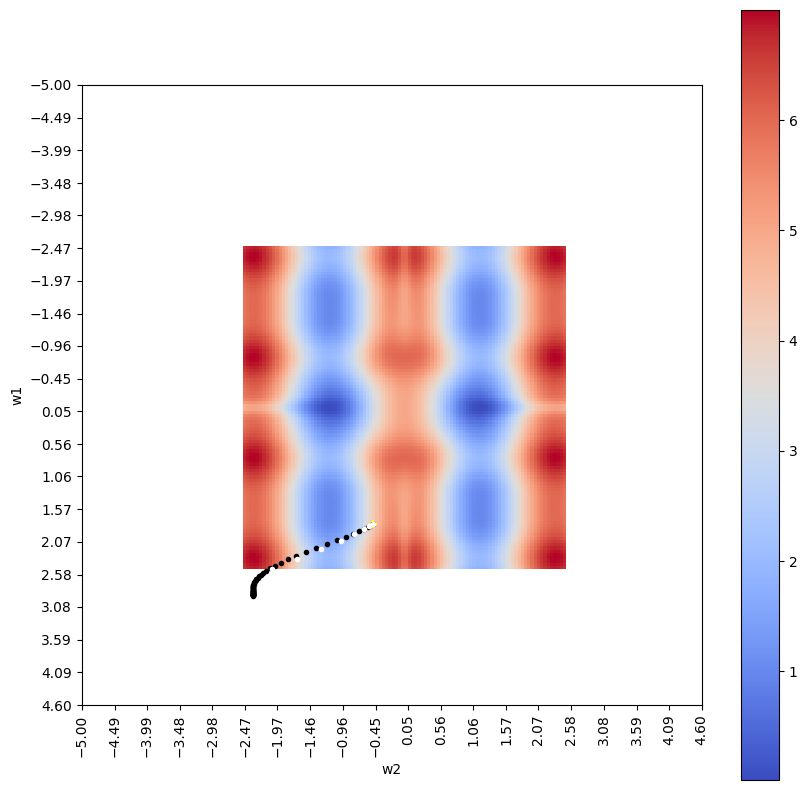

In [53]:
from numpy import *
import numpy as np

#f = np.sin(w1)**4 + 5*np.cos(w2/1.5)**2 + np.tanh(w1*w2)**2
import sympy
w1, w2 = sympy.symbols("w1 w2")
f1 = sympy.Pow( sympy.sin(w1), 4 )
f2 = 5 * sympy.Pow(sympy.cos(w2/1.5), 2)
f3 = sympy.Pow( sympy.tanh(w1*w2), 2 )
loss = f1 + f2 + f3

dloss_dw1 = sympy.diff(loss, w1)
dloss_dw2 = sympy.diff(loss, w2)
#print( f"dloss_dw1={dloss_dw1}" )
#print( f"dloss_dw2={dloss_dw2}" )

def compute_loss(w1,w2):
    return sin(w1)**4 + 5*cos(w2/1.5)**2 + tanh(w1*w2)**2

def compute_gradient(w1,w2):
    deriv1 = 2*w2*(1 - tanh(w1*w2)**2)*tanh(w1*w2) + 4*sin(w1)**3*cos(w1)
    deriv2 = 2*w1*(1 - tanh(w1*w2)**2)*tanh(w1*w2) - 6.66666666666667*sin(0.666666666666667*w2)*cos(0.666666666666667*w2 )
    gradient = [ deriv1, deriv2 ]
    return np.array(gradient)
    
alle_zeilen = []
sections = 100
r = 5
w1_values = linspace(-r,+r,sections)
w2_values = linspace(-r,+r,sections)
w1_ticks = [round(w1,2) for i,w1 in enumerate(w1_values) if i % 5 == 0]
w2_ticks = [round(w2,2) for i,w2 in enumerate(w2_values) if i % 5 == 0]
for w1 in w1_values:
    eine_zeile = []    
    for w2 in w2_values:
        f = compute_loss(w1,w2)        
        eine_zeile.append( f )        
    alle_zeilen.append( eine_zeile )    
ErrorSurface = array( alle_zeilen )


def gradient_descent(start_w1, start_w2, steps, alpha, beta=0.0):
    
    points_w1 = []
    points_w2 = []
    
    w1 = start_w1
    w2 = start_w2
    
    velocity_vec = np.array([0.0, 0.0])
    
    for step_nr in range(steps):
        g = compute_gradient(w1,w2)
        #print( f"g={g}, ||g||={linalg.norm(g)}" )
        
        velocity_vec = beta * velocity_vec + alpha * g
        
        w1 = w1 - velocity_vec[0]
        w2 = w2 - velocity_vec[1]
        points_w1.append(w1)
        points_w2.append(w2)
        
    return points_w1, points_w2

    
start_w1 = random.uniform(-r,+r)
start_w2 = random.uniform(-r,+r)
nr_steps = 60
alpha = 0.05
points_w1, points_w2 = gradient_descent(start_w1,
                                        start_w2,
                                        nr_steps,
                                        alpha)

pointsM_w1, pointsM_w2 = gradient_descent(start_w1,
                                          start_w2,
                                          nr_steps,
                                          alpha,
                                          beta=0.7)

import matplotlib.pyplot as plt
plt.figure( figsize=(10,10) )
plt.imshow( ErrorSurface, cmap="coolwarm", extent=[-r,+r,+r,-r] )
plt.colorbar()

plt.scatter(points_w2, points_w1, marker=".", color="black")
plt.scatter(points_w2[0], points_w1[0], marker="+", color="yellow")

plt.scatter(pointsM_w2, pointsM_w1, marker=".", color="white")

plt.xlabel("w2")
plt.ylabel("w1")
plt.xticks( w2_ticks, rotation=90 )
plt.yticks( w1_ticks )
plt.show()



In [40]:
type(array)

builtin_function_or_method

# Trockenübung:`sympy`

In [13]:
#f = np.sin(w1)**4 + 5*np.cos(w2/1.5)**2 + np.tanh(w1*w2)**2
import sympy
w1, w2 = sympy.symbols("w1 w2")
f1 = sympy.Pow( sympy.sin(w1), 4 )
f2 = 5 * sympy.Pow(sympy.cos(w2/1.5), 2)
f3 = sympy.Pow( sympy.tanh(w1*w2), 2 )
loss = f1 + f2 + f3


def compute_loss(_w1,_w2):
    loss_val = float( loss.evalf( subs={w1: _w1, w2: _w2} ) )
    print(f"type of loss_val is {type(loss_val)}")
    return loss_val

def compute_gradient(_w1, _w2):
    
    # 1. compute symbolic representation of partial derivatives
    dloss_dw1 = sympy.diff(loss, w1)
    dloss_dw2 = sympy.diff(loss, w2)
    
    # 2. evaluate partial derivative functions
    d = {w1: _w1, w2: _w2}    
    l1 = dloss_dw1.evalf( subs=d )
    l2 = dloss_dw2.evalf( subs=d )
    
    # 3. combine individual loss values to gradient vector
    gradient = [l1, l2]
    return gradient

In [14]:
ergebnis = compute_loss(1,10)

type of loss_val is <class 'float'>


In [10]:
ergebnis

5.80142224073122

In [11]:
type(ergebnis)

sympy.core.numbers.Float

In [ ]:
ergebnis.